<a href="https://colab.research.google.com/github/codingercat/machine-learning-projects/blob/main/Diabetes_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes (1).csv


{'diabetes (1).csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.25

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


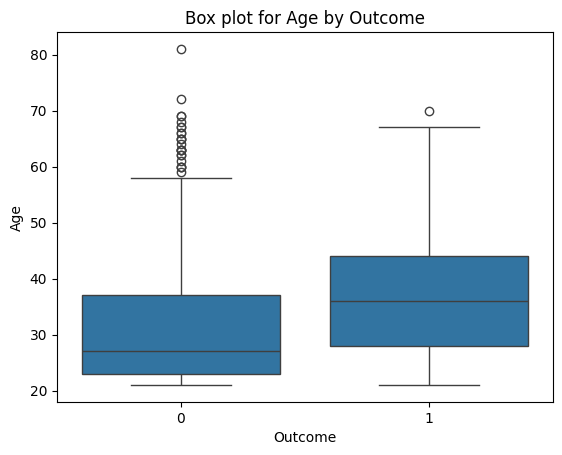

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'diabetes' is your DataFrame
feature_to_plot = 'Age'

sns.boxplot(x='Outcome', y=feature_to_plot, data=diabetes)
plt.title(f'Box plot for {feature_to_plot} by Outcome')
plt.show()


In [ ]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI !=0) & (diabetes.Glucose != 0)]

<Axes: >

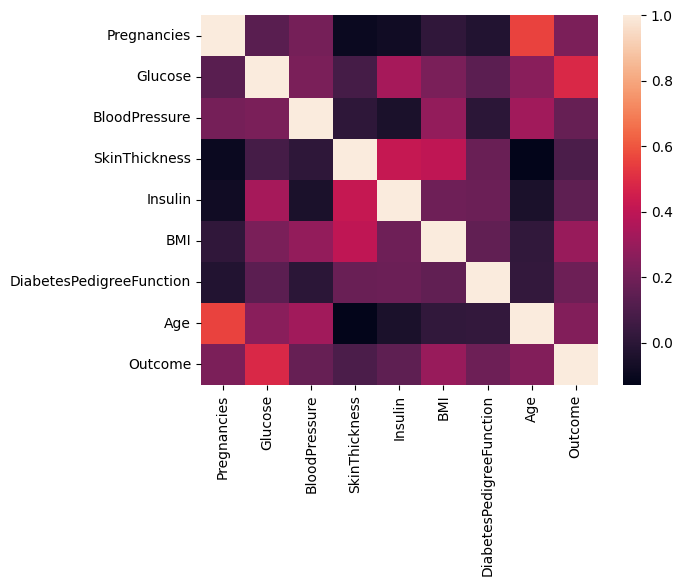

In [ ]:
sns.heatmap(diabetes_mod.corr())

In [ ]:
import pandas as pd
import numpy as np

## DATA CLEANING ##
df = pd.read_csv('diabetes.csv')

def replace_outliers_with_average(column):
    z_scores = np.abs((column - column.mean()) / column.std())
    is_outlier = z_scores > 3

    df.loc[is_outlier, column.name] = column.mean()

for column in df.select_dtypes(include=np.number):
    replace_outliers_with_average(df[column])

df.to_csv('cleaned_diabetes.csv', index=False)


In [ ]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                  0.627000  50.0      1.0  
1                  0.351000  31.0      0.0  
2                  0.672000  32.0      1.0  
3                  0.167000  21.0      0.0  
4                  0.471876  33.0      1.0  


In [ ]:
# Check for missing values in the cleaned dataset
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Check for duplicate rows in the cleaned dataset
print(df.duplicated().sum())

0


In [ ]:
# Display summary statistics of the cleaned dataset
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.786953  121.681605      72.254807      20.434292   68.806498   
std       3.270156   30.436016      12.115932      15.698281   87.975814   
min       0.000000   44.000000      24.000000       0.000000    0.000000   
25%       1.000000   99.750000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  119.250000   
max      13.000000  199.000000     122.000000      63.000000  415.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.336453                  0.451223   32.987245    0.348958  
std      6.628821                  0.279571   11.322991    0.476951  
min     18.200000                  

In [ ]:
# LOGISTIC REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('cleaned_diabetes.csv')

In [ ]:
y_true = df['Outcome']

In [ ]:
train_size = int(0.8 * len(df))
y_train, y_test = y_true[:train_size], y_true[train_size:]

In [ ]:
def confusion_matrix(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    true_negative = np.sum((y_true == 0) & (y_pred == 0))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([[true_negative, false_positive],
                     [false_negative, true_positive]])

In [ ]:
y_pred = np.ones(len(y_test))

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.flatten()

print("Confusion Matrix:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

Confusion Matrix:
True Negatives (TN): 0
False Positives (FP): 99
False Negatives (FN): 0
True Positives (TP): 55


In [ ]:
#calculation of the different performance metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
beta = 0.5
f_beta_score = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) if (precision + recall) > 0 else 0

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-beta Score: {f_beta_score:.2f}")


Accuracy: 0.36
Precision: 0.36
Recall: 1.00
F-beta Score: 0.41
